In [1]:
import pydantic
from typing import Union


from local_lib.base import BTree
from local_lib.misc import affiche_valeurs, custom_markdown_style
custom_markdown_style()

<div style="color:red; font-size: large">
    
## Notes: 

- ajouter plus d'exemples
- fonctions pour afficher tous les noeuds d'un arbre (i.e. parcours)
- finir profondeur

</div>

# Arbres binaires

Un arbre binaire est un arbre dans lequel chaque nœud a au plus deux enfants. On les appellera "left" et "right" (i.e. enfaut "gauche" et enfant "droit").

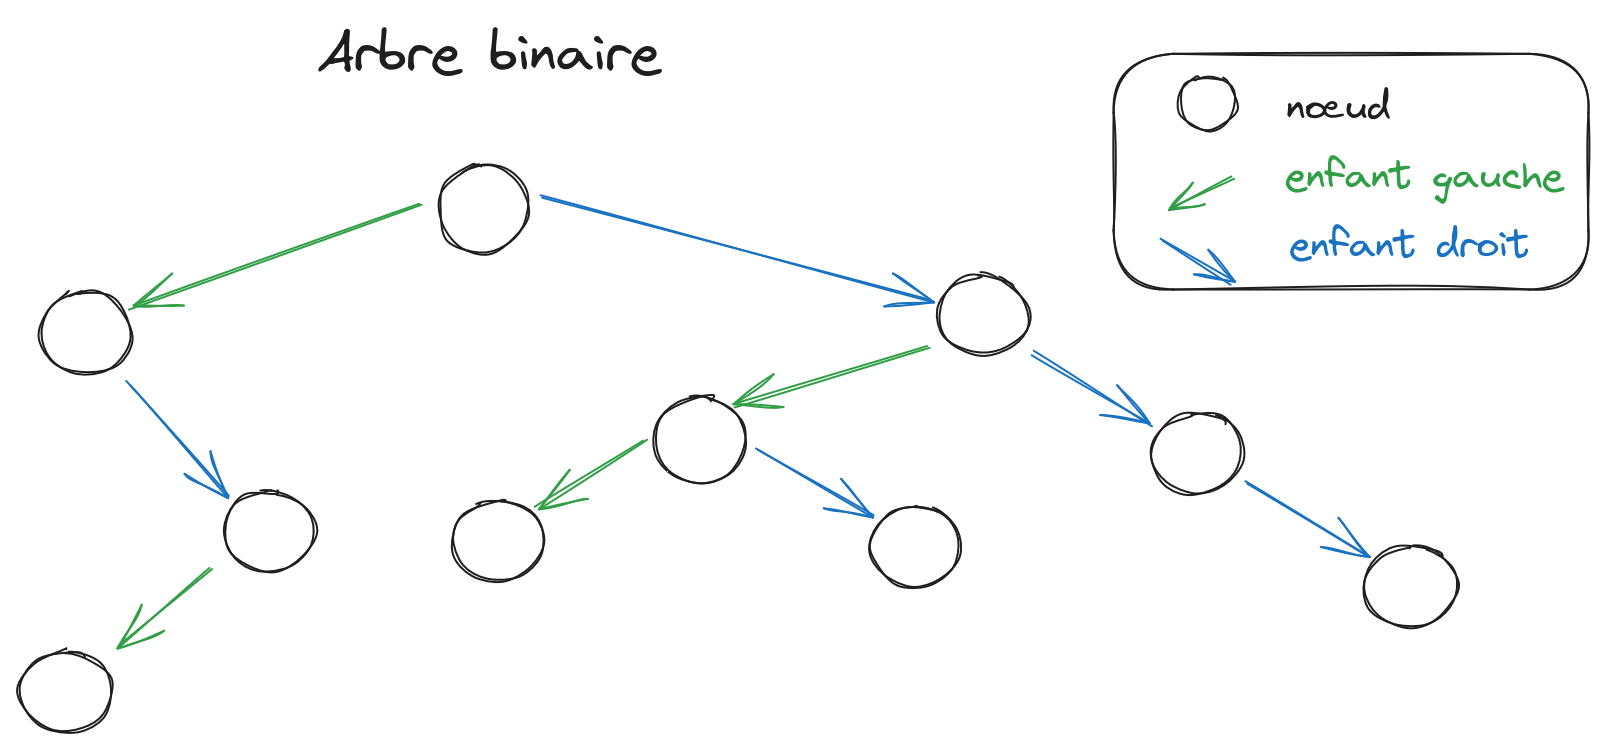

Pour implémenter les arbres, nous utiliserons une structure de données récursive:

```python
class BTree:
    value: str
    left: BTree | None
    right: BTree | None
```


## Exemples

In [2]:
# arbre constitué d'un seul nœud, portant la valeur "abc"
btree_1 = BTree(value="abc")
btree_1

──abc

In [3]:
# arbre constitué d'un nœud avec un enfant gauche

btree_2 = BTree(
    left=BTree(value="a"), 
    value="abc")
btree_2

  ╭─╴a
──abc

In [4]:
# arbre plus compliqué
btree_3 = BTree(
    value="abc",
    left=BTree(value="l"), 
    right=BTree(
        value="r",
        left=BTree(value="rl"), 
    ), 
)
btree_3

  ╭─╴l
──abc
  │  ╭─╴rl
  ╰─╴r

## Exercice 1: Recherche dans un arbre binaire

Afin de rechercher une valeur dans l'arbre, on va devoir en parcourir l'ensemble des noeuds. Les fonctions récursives sont particulièrement adaptées pour parcourir les structures de données récursives.



In [5]:
def search_btree(abr: BTree, value: str) ->  bool:
    """
    Renvoie True si un nœud de l'arbre contient value, False sinon.

    Indice: on pourra appeller `search_btree` sur les parties gauche et droite de l'arbre.
    """
    #BEGIN
    if abr.value == value:
        return True
    if abr.left:
        found_left = search_btree(abr.left, value)
        if found_left:
            return True
    if abr.right:
        found_right = search_btree(abr.right, value)
        if found_right:
            return True
    print(f"Nœud {abr.value}: pas trouvé {value}")
    return False
    #END

In [6]:
assert search_btree(btree_1, "abc") is True

In [7]:
assert search_btree(btree_1, "cba") is False

Nœud abc: pas trouvé cba


In [8]:
assert search_btree(btree_2, "a") is True

In [9]:
assert search_btree(btree_2, "b") is False

Nœud a: pas trouvé b
Nœud abc: pas trouvé b


In [10]:
assert search_btree(btree_3, "rl") is True

Nœud l: pas trouvé rl


## Exercice 2: opérateurs min et max

De la même manière, on peut implémenter des fonctions récursives qui permettent de calculer le min et le max des valeurs de l'arbre.

In [11]:
def max_btree(btree: BTree) -> str:
    """retourne la plus grande valeur de l'arbre btree (qui n'est pas forcément un abr"""
    #BEGIN
    res = btree.value
    if btree.left:
        max_left = max_btree(btree.left)
        if max_left > res:
            res = max_left
    if btree.right:
        max_right = max_btree(btree.right)
        if max_right > res:
            res = max_right
    return res
    #END

In [12]:
def min_btree(btree: BTree) -> str:
    """retourne la plus petite valeur de l'arbre btree (qui n'est pas forcément un abr"""
    #BEGIN
    res = btree.value
    if btree.left:
        min_left = min_btree(btree.left)
        if min_left < res:
            res = min_left
    if btree.right:
        min_right = min_btree(btree.right)
        if min_right < res:
            res = min_right
    return res
    #END

## Exercice 3: profondeur

In [13]:
def profondeur(btree: BTree) -> int:
    """
    TODO: define + examples
    """
    #BEGIN
    if btree.left:
        depth_left = profondeur(btree.left)
    else:
        depth_left = 0
    if btree.right:
        depth_right = profondeur(btree.right)
    else:
        depth_right = 0
    if btree.left is None and btree.right is None:
        return 0
    return 1 + max(depth_left, depth_right)
    # END

# Arbres binaires de recherche

Un arbre binaire de recherche est un arbre binaire, qui a la propriété suivante: pour chaque nœud $n$, la valeur de tous les nœuds à gauche est plus petite que la valeur de $n$, et la valeur de tous les nœuds à droite est plus grande que la valeur de $n$.

Les arbres binaires de recherche sont utilisés pour créer par exemple des indexes, ou des ensembles. Nous allons ici implémeter une classe `Set` (ensemblee en anglais).

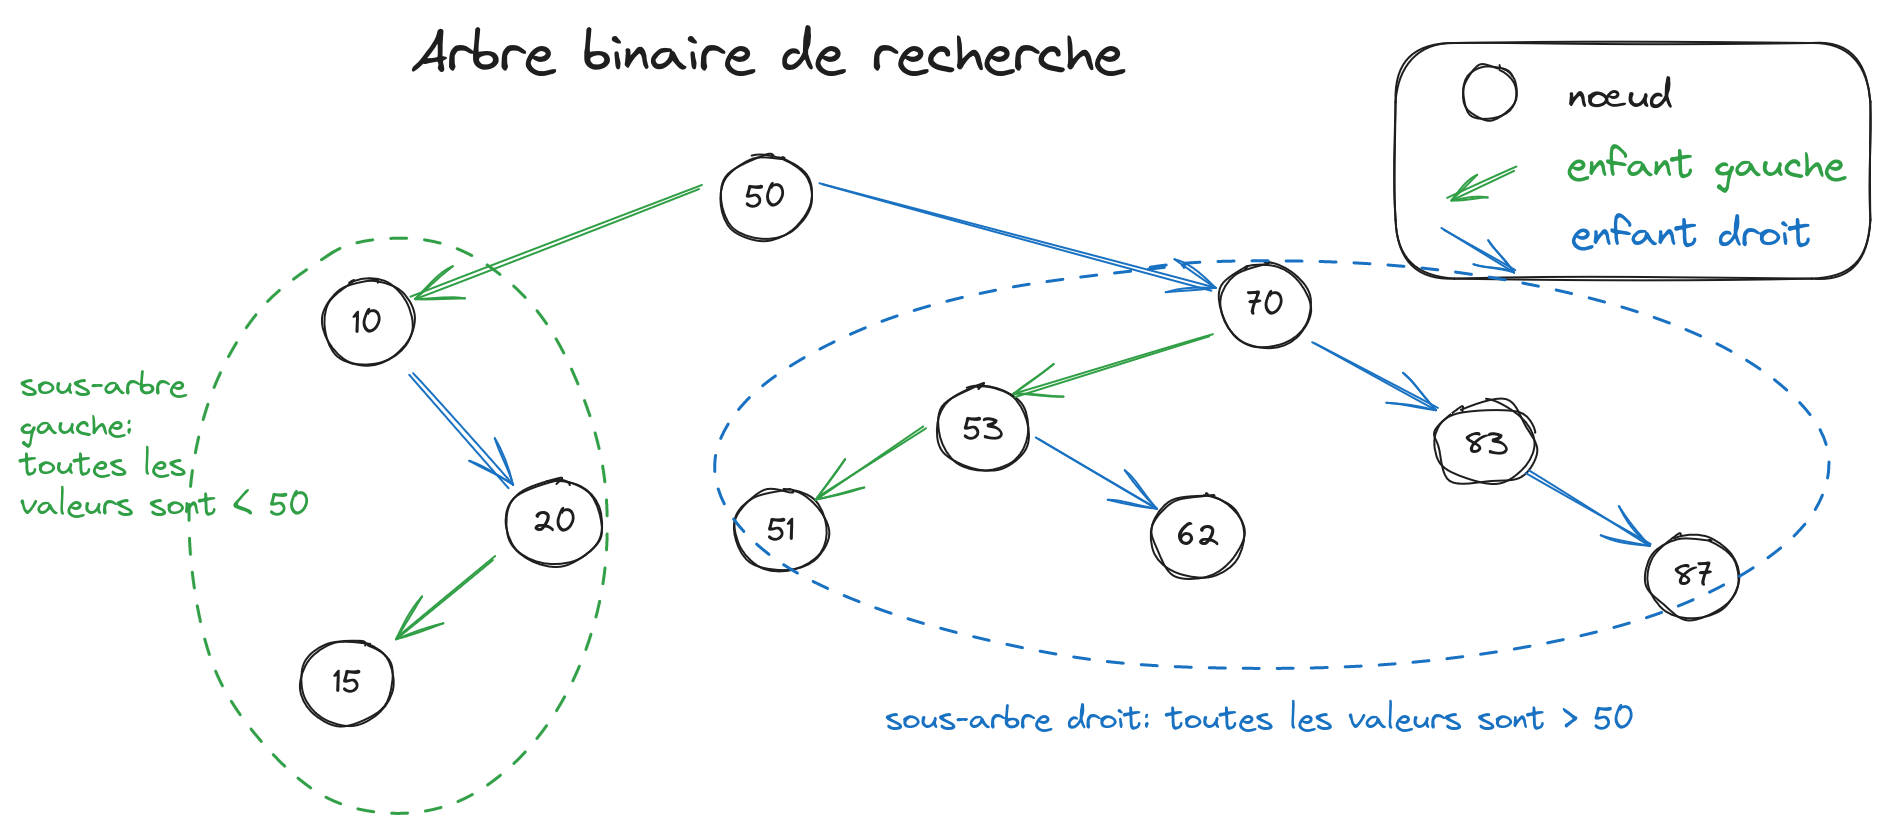

---

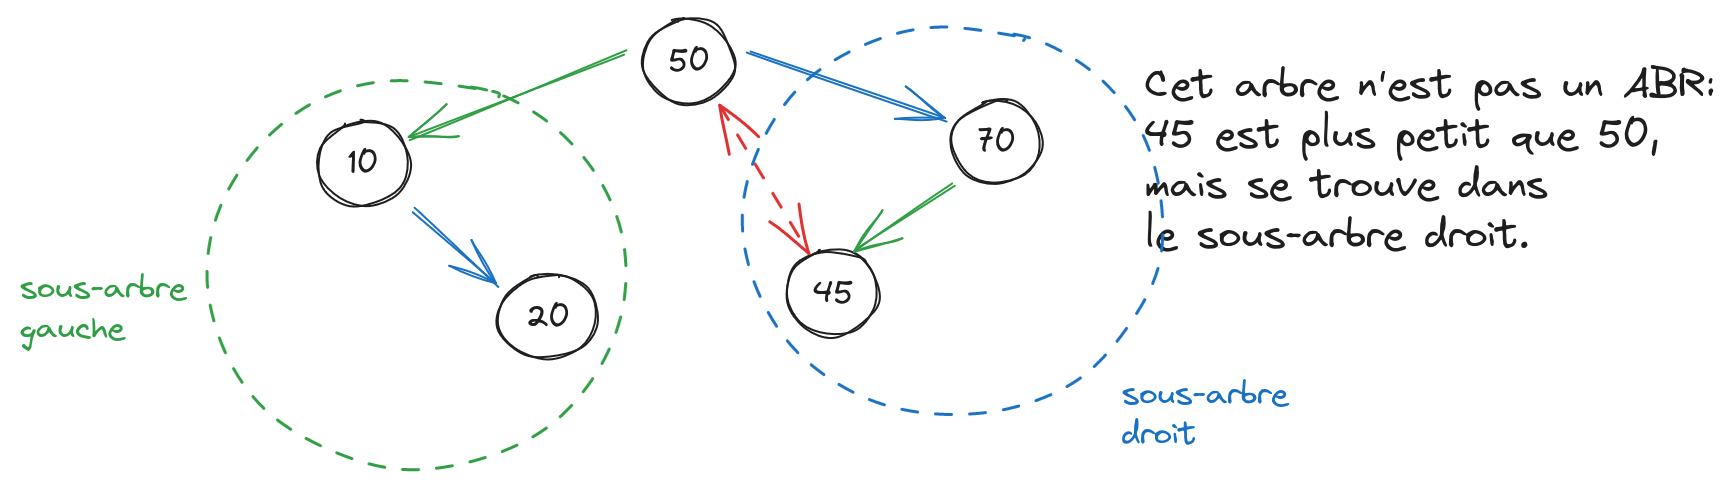

## Exercices

### Exercice 1

Parmi les arbres suivants, lesquels sont des arbres binaires de recherche ?

**Note:** les comparaisons de chaîne se font dans l'ordre lexicographique (comme un dictionnaire).

In [14]:
ex1 = BTree(
    left=BTree(value="cca"), 
    value="ccc", 
    right=BTree(value="ccd")
)
ex1

  ╭─╴cca
──ccc
  ╰─╴ccd

In [15]:
ex2 = BTree(
    left=BTree(value="cda"), 
    value="ccc", 
    right=BTree(value="ccd")
)
ex2

  ╭─╴cda
──ccc
  ╰─╴ccd

In [16]:
ex3 = BTree(
    left=BTree(
        left=BTree(
            value="aaa",
        ),
        value="aca",
        right=BTree(
            value="acd",
            right=BTree(value="ace")
        )
    ),
    value="cca",
    right=BTree(
        left=BTree(value="ccb"),
        value="ccd"
    )
)
ex3

     ╭─╴aaa
  ╭─╴aca
  │  ╰─╴acd
  │     ╰─╴ace
──cca
  │  ╭─╴ccb
  ╰─╴ccd

In [17]:
ex4 = BTree(
    left=BTree(
        left=BTree(
            value="aaa",
        ),
        value="aca",
        right=BTree(
            value="acd",
            right=BTree(value="ace")
        )
    ),
    value="cca", 
    right=BTree(
        left=BTree(value="ccb"),
        value="ccd",
        right=BTree(value="aab")
    )
)
ex4

     ╭─╴aaa
  ╭─╴aca
  │  ╰─╴acd
  │     ╰─╴ace
──cca
  │  ╭─╴ccb
  ╰─╴ccd
     ╰─╴aab

### Exercice 2: Recherche dans un arbre binaire de recherche

In [18]:
def search_abr(abr: BTree, value: str) ->  bool:
    """
    Renvoie True si un nœud de l'arbre contient value, False sinon.
    On suppose que l'arbre vérifie la propritété des arbres binaires de recherche
    """
    #BEGIN
    if abr.value == value:
        return True
    elif value < abr.value and abr.left:
        return search_abr(abr.left, value)
    elif value > abr.value and abr.right:
        return search_abr(abr.right, value)
    else:
        return False
    #END

### Exercice 3: Test de propriété

On va implémenter la fonction `is_abr` qui permet de tester si un arbre est un abr

In [19]:
def is_abr(abr: BTree) -> bool:
    """Retourne True si abr est un arbre binaire de recherche (False sinon).
    
    On devra vérifier: 
        - que le max de l'arbre à gauche est plus petit que la valeur du nœud
        - que l'arbre à gauche est un abr
        - que le min de l'arbre à droite est plus grand que la valeur du nœud
        - que l'arbre à droite est un abr
    """
    #BEGIN
    if abr.left:
        max_left = max_btree(abr.left)
        if max_left > abr.value:
            print(f"Max left {max_left}, value {abr.value}")
            return False
        if not is_abr(abr.left):
            print(f"not abr ?\n{abr.left}")
            return False
    if abr.right:
        min_right = min_btree(abr.right)
        if min_right < abr.value:
            print(f"Min right {min_right}, value {abr.value}")
            return False
        if not is_abr(abr.right):
            print(f"not abr ?\n{abr.right}")
            return False
    return True
    #END

In [20]:
is_abr(ex1)

True

In [21]:
is_abr(ex2)

Max left cda, value ccc


False

In [22]:
is_abr(ex3)

True

In [23]:
is_abr(ex4)

Min right aab, value cca


False

In [24]:
def ajout_abr(abr: BTree, value: str) -> BTree:
    """
    Ajoute un élément à un ABR, en conservant la propriété d'ABR.
    Renvoie le même ABR si l'élément est déjà présent
    """
    #BEGIN
    if value == abr.value:
        return abr
    if value < abr.value:
        if abr.left:
            abr.left = ajout_abr(abr.left, value)
        else:
            abr.left = BTree(value=value)
    if value > abr.value:
        if abr.right:
            abr.right = ajout_abr(abr.right, value)
        else:
            abr.right = BTree(value=value)
    return abr
    #END

In [25]:
ex3

     ╭─╴aaa
  ╭─╴aca
  │  ╰─╴acd
  │     ╰─╴ace
──cca
  │  ╭─╴ccb
  ╰─╴ccd

In [26]:
ajout_abr(ex3, "aa")

        ╭─╴aa
     ╭─╴aaa
  ╭─╴aca
  │  ╰─╴acd
  │     ╰─╴ace
──cca
  │  ╭─╴ccb
  ╰─╴ccd

In [27]:
ajout_abr(ex3, "b")

        ╭─╴aa
     ╭─╴aaa
  ╭─╴aca
  │  ╰─╴acd
  │     ╰─╴ace
  │        ╰─╴b
──cca
  │  ╭─╴ccb
  ╰─╴ccd

# Ensemble

D'après [wikipedia](https://fr.wikipedia.org/wiki/Ensemble_(informatique)):

> En informatique, un ensemble ou set est un type abstrait qui peut stocker certaines valeurs, sans ordre particulier, et sans répétition. Il s'agit d'une mise en œuvre informatique de la notion mathématique d'ensemble fini.  

On implémentera un ensemble avec les opérations suivantes:

```python
class AbstractSet:
    def contains(self, value: str) -> bool:
        ...
    def add(self, value: str):
        ...
```

Dans cette partie, nous allons implémenter deux versions différentes d'ensembles:

- une implémentation avec un tableau
- une implémentation avec un arbre

In [28]:
class TreeSet:
    def __init__(self):
        self.abr = None
    
    def contains(self, value) -> bool:
        """Ajoute un élément à l'ensemble"""
        return search_abr(self.abr, value)
    
    def add(self, value):
        """Ajoute un élément à l'ensemble"""
        if self.abr is None:
            self.abr = BTree(value=value)
        else:
            self.abr = ajout_abr(self.abr, value)

    @staticmethod
    def from_values(values):
        res = TreeSet()
        for val in values:
            res.add(val)
        return res

In [29]:
class ArraySet:
    def __init__(self):
        self.arr = []

    def contains(self, value):
        """Ajoute un élément à l'ensemble"""
        for val in self.arr:
            if val == value:
                return True
        return False

    def add(self, value):
        """Ajoute un élément à l'ensemble"""
        self.arr.append(value)
    
    @staticmethod
    def from_values(values):
        res = ArraySet()
        for val in values:
            res.add(val)
        return res

In [30]:
import time
import random
import string

def random_name(length: int):
    return "".join(random.choice(string.ascii_letters) for _ in range(length))


all_values = [random_name(10) for _ in range(50_000)]
to_insert = [random_name(10) for _ in range(100)]
to_search = [random_name(10) for _ in range(100)]

In [31]:
test_tree = TreeSet.from_values(all_values)
test_arr = ArraySet.from_values(all_values)
for val in to_search:
    assert test_tree.contains(val) == test_arr.contains(val)

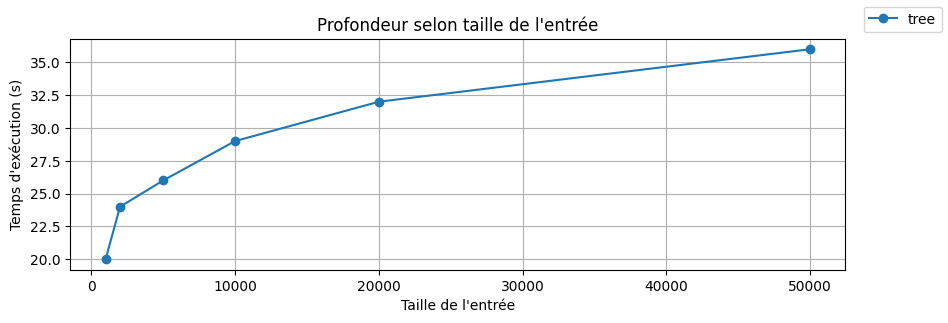

In [32]:
affiche_valeurs(
    titre="Profondeur selon taille de l'entrée",
    ylabel="profondeur",
    tree=(
        (1000, profondeur(TreeSet.from_values(all_values[:1000]).abr)),
        (2000, profondeur(TreeSet.from_values(all_values[:2000]).abr)),
        (5000, profondeur(TreeSet.from_values(all_values[:5000]).abr)),
        (10000, profondeur(TreeSet.from_values(all_values[:10000]).abr)),
        (20000, profondeur(TreeSet.from_values(all_values[:20000]).abr)),
        (50000, profondeur(TreeSet.from_values(all_values[:50000]).abr)),
    ),
)

In [33]:
def benchmark_add(Klass, nb_items: int):
    magasin = Klass.from_values(all_values[0:nb_items])
    
    start_time = time.perf_counter()
    for value in to_insert:
        magasin.add(value)
    end_time = time.perf_counter()

    print(f"({nb_items}, {end_time - start_time}), # insertion {Klass.__name__}")
    return nb_items, end_time - start_time

def benchmark_contains(Klass, nb_items: int):
    magasin = Klass.from_values(all_values[0:nb_items])

    start_time = time.perf_counter()
    for value in to_search:
        magasin.contains(value)
    end_time = time.perf_counter()

    print(f"({nb_items}, {end_time - start_time}), # recherche {Klass.__name__}")
    return nb_items, end_time - start_time

(1000, 0.0016138880000653444), # insertion TreeSet
(2000, 0.0015209119992505293), # insertion TreeSet
(5000, 0.0021821480004291516), # insertion TreeSet
(10000, 0.0019943919996876502), # insertion TreeSet
(1000, 5.920999683439732e-06), # insertion ArraySet
(2000, 3.952000042772852e-06), # insertion ArraySet
(5000, 3.545999788912013e-06), # insertion ArraySet
(10000, 3.6170004023006186e-06), # insertion ArraySet


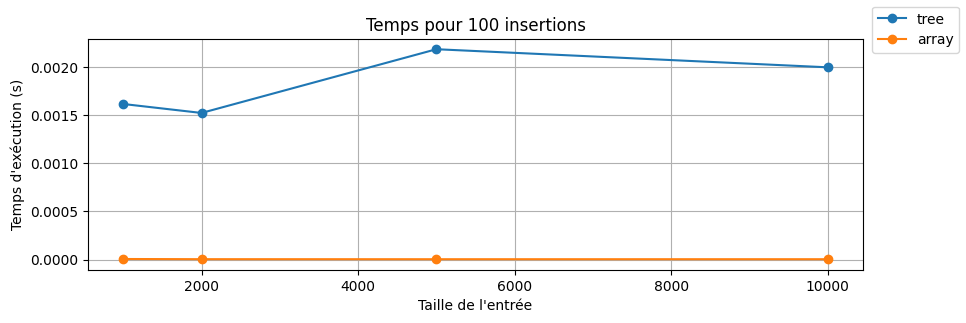

In [34]:
affiche_valeurs(
    titre="Temps pour 100 insertions",
    tree=(
        benchmark_add(TreeSet, nb_items=1000),
        benchmark_add(TreeSet, nb_items=2000),
        benchmark_add(TreeSet, nb_items=5000),
        benchmark_add(TreeSet, nb_items=10000)
    ),
    array=(
        benchmark_add(ArraySet, 1000),
        benchmark_add(ArraySet, 2000),
        benchmark_add(ArraySet, 5000),
        benchmark_add(ArraySet, 10000)
    )
)

(1000, 0.00011872599861817434), # recherche TreeSet
(2000, 0.00019932199938921258), # recherche TreeSet
(5000, 0.0002316210011485964), # recherche TreeSet
(10000, 0.0003707799987751059), # recherche TreeSet
(1000, 0.0014775669988011941), # recherche ArraySet
(2000, 0.0028570640006364556), # recherche ArraySet
(5000, 0.006394841000656015), # recherche ArraySet
(10000, 0.013090835000184597), # recherche ArraySet


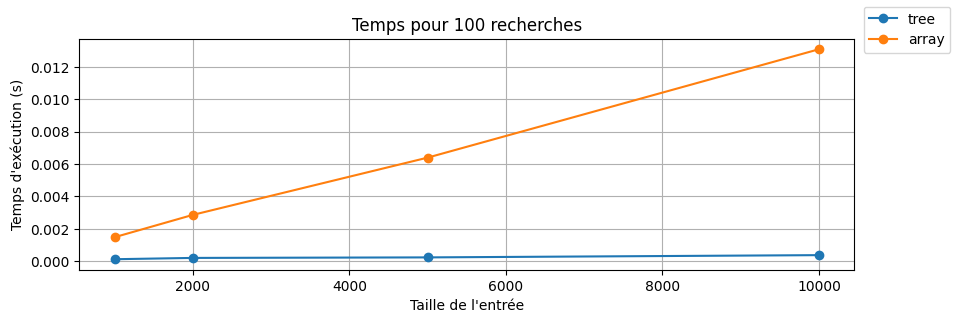

In [35]:
affiche_valeurs(
    titre="Temps pour 100 recherches",
    tree=(
        benchmark_contains(TreeSet, nb_items=1000),
        benchmark_contains(TreeSet, nb_items=2000),
        benchmark_contains(TreeSet, nb_items=5000),
        benchmark_contains(TreeSet, nb_items=10000),
    ),
    array=(
        benchmark_contains(ArraySet, nb_items=1000),
        benchmark_contains(ArraySet, nb_items=2000),
        benchmark_contains(ArraySet, nb_items=5000),
        benchmark_contains(ArraySet, nb_items=10000)
    )
)